# Multilabel

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

In [22]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Always make it pretty.
plt.style.use('ggplot')

In [4]:
multilabel_raw = pd.read_csv('genres_labeled_6405.csv')
multilabel_raw.head()

,actor_id,words,id_doc,name,gender,knownForTitles,genres_pro
0,nm0000239,tyler tyler septemb bear rundgren juli york ci...,"[729, 729, 633, 5, 609, 387, 769, 166, 769, 59...",Liv Tyler,F,"tt0120591,tt0120737,tt0167260,tt0482606","0.0,0.25,0.0,0.0,0.0,0.0,0.16666666666666666,0..."
1,nm3931285,terri moor refer terri moor basebal american m...,"[800, 475, 37, 800, 475, 776, 0, 438, 786, 776...",Terry Moore,M,tt0858411,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0...."
2,nm1483196,jerri ferrara bear novemb brooklyn york occup ...,"[840, 829, 5, 496, 809, 769, 501, 772, 768, 59...",Jerry Ferrara,M,"tt1204975,tt1621045,tt1674771","0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
3,nm4419771,justin lupe bear denver colorado educ juilliar...,"[981, 982, 5, 976, 974, 232, 980, 619, 501, 60...",Justine Lupe,F,tt2347569,"0.0,0.0,0.3333333333333333,0.0,0.0,0.0,0.0,0.0..."
4,nm1019674,articl need addit citat verif help improv arti...,"[2, 484, 988, 992, 1023, 341, 999, 2, 62, 992,...",Sala Baker,M,"tt1515091,tt2072233,tt5001754,tt5463162","0.0,0.18181818181818182,0.0,0.0,0.181818181818..."


In [ ]:
# genres_pro
['Adult', 'Adventure', 'Romance', 'History', 'Crime',
       'Western', 'Fantasy', 'Documentary', 'Horror', 'Mystery', 'Reality-TV',
       'Talk-Show', 'Sci-Fi', 'Thriller', 'News', 'Action', 'War', 'Animation',
       'Short', 'Game-Show', 'Comedy', 'Biography', 'Sport', 'Musical',
       'Music', 'Family', 'Drama', 'Film-Noir']

In [5]:
multilabel = multilabel_raw.copy()
multilabel[['Adult', 'Adventure', 'Romance', 'History', 'Crime',
       'Western', 'Fantasy', 'Documentary', 'Horror', 'Mystery', 'Reality-TV',
       'Talk-Show', 'Sci-Fi', 'Thriller', 'News', 'Action', 'War', 'Animation',
       'Short', 'Game-Show', 'Comedy', 'Biography', 'Sport', 'Musical',
       'Music', 'Family', 'Drama', 'Film-Noir']] = multilabel.genres_pro.str.split(",",expand=True,)
multilabel.head()

,actor_id,words,id_doc,name,gender,knownForTitles,genres_pro,Adult,Adventure,Romance,...,Short,Game-Show,Comedy,Biography,Sport,Musical,Music,Family,Drama,Film-Noir
0,nm0000239,tyler tyler septemb bear rundgren juli york ci...,"[729, 729, 633, 5, 609, 387, 769, 166, 769, 59...",Liv Tyler,F,"tt0120591,tt0120737,tt0167260,tt0482606","0.0,0.25,0.0,0.0,0.0,0.0,0.16666666666666666,0...",0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16666666666666666,0.0
1,nm3931285,terri moor refer terri moor basebal american m...,"[800, 475, 37, 800, 475, 776, 0, 438, 786, 776...",Terry Moore,M,tt0858411,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0....",0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nm1483196,jerri ferrara bear novemb brooklyn york occup ...,"[840, 829, 5, 496, 809, 769, 501, 772, 768, 59...",Jerry Ferrara,M,"tt1204975,tt1621045,tt1674771","0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",0.0,0.0,0.2,...,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.2,0.0
3,nm4419771,justin lupe bear denver colorado educ juilliar...,"[981, 982, 5, 976, 974, 232, 980, 619, 501, 60...",Justine Lupe,F,tt2347569,"0.0,0.0,0.3333333333333333,0.0,0.0,0.0,0.0,0.0...",0.0,0.0,0.3333333333333333,...,0.0,0.0,0.3333333333333333,0.0,0.0,0.0,0.0,0.0,0.3333333333333333,0.0
4,nm1019674,articl need addit citat verif help improv arti...,"[2, 484, 988, 992, 1023, 341, 999, 2, 62, 992,...",Sala Baker,M,"tt1515091,tt2072233,tt5001754,tt5463162","0.0,0.18181818181818182,0.0,0.0,0.181818181818...",0.0,0.18181818181818182,0.0,...,0.0,0.0,0.09090909090909091,0.0,0.0,0.0,0.0,0.0,0.09090909090909091,0.0


In [19]:
multilabel_label_fre_to_num = multilabel[multilabel.columns[7:]]
multilabel_label_fre_to_num = pd.DataFrame(np.where(multilabel_label_fre_to_num != '0.0', 1, 0), index=multilabel_label_fre_to_num.index, columns=multilabel_label_fre_to_num.columns)
multilabel_label_fre_to_num.head()

,Adult,Adventure,Romance,History,Crime,Western,Fantasy,Documentary,Horror,Mystery,...,Short,Game-Show,Comedy,Biography,Sport,Musical,Music,Family,Drama,Film-Noir
0,0,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


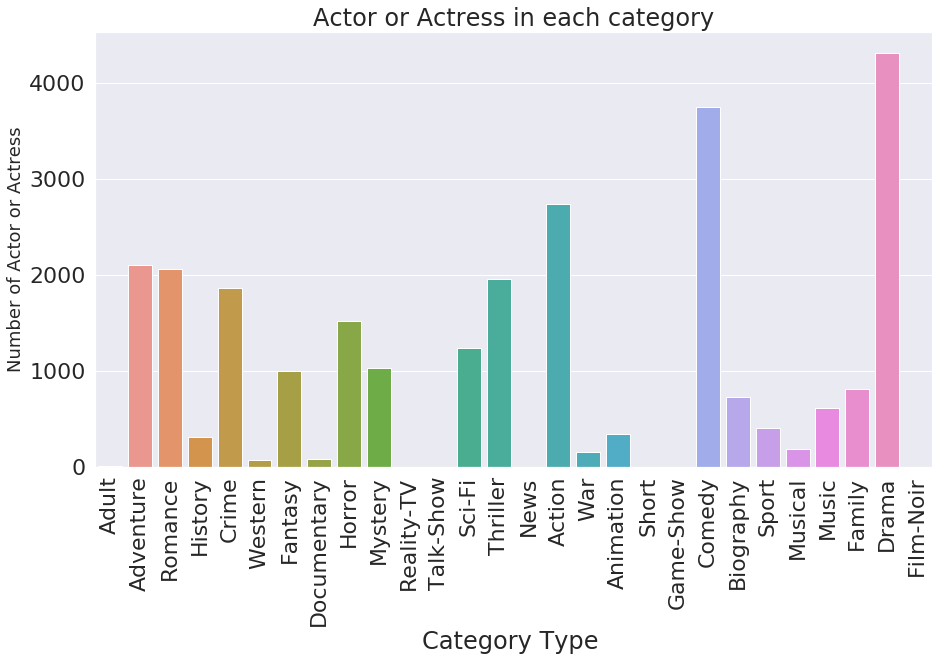

In [126]:
categories = list(multilabel_label_fre_to_num.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, multilabel_label_fre_to_num.iloc[:,:].sum().values)
plt.title("Actor or Actress in each category", fontsize=24)
plt.ylabel('Number of Actor or Actress', fontsize=18)
plt.xlabel('Category Type ', fontsize=24)
plt.xticks(rotation='vertical')
#adding the text labels
# rects = ax.patches
# labels = multilabel_label_fre_to_num.iloc[:,:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()


# Counting the number of comments having multiple labels.

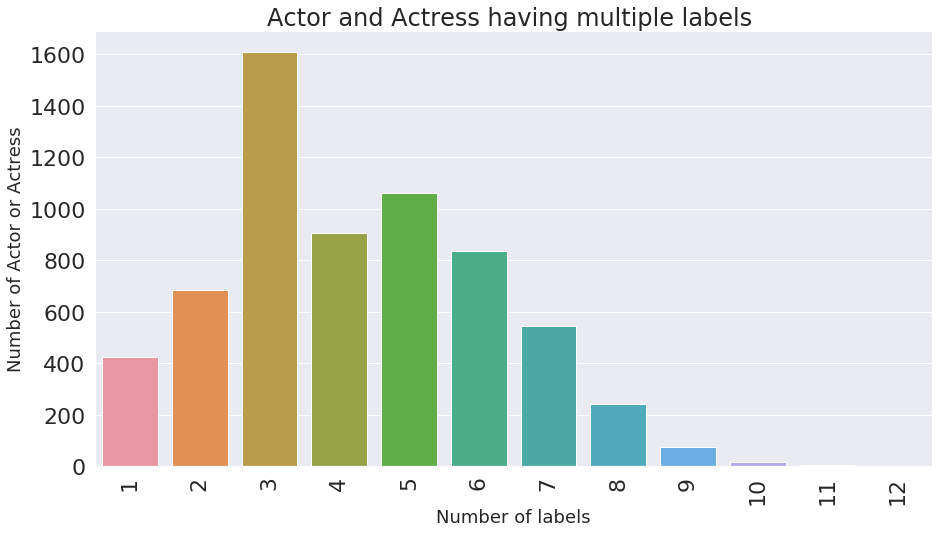

In [125]:
rowSums = multilabel_label_fre_to_num.iloc[:,:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index.values, multiLabel_counts.values)
plt.title("Actor and Actress having multiple labels ")
plt.ylabel('Number of Actor or Actress', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
plt.xticks(rotation='vertical')
#adding the text labels
# rects = ax.patches
# labels = multiLabel_counts.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [78]:
multiLabel_counts.index

Int64Index([5, 4, 6, 2, 7, 1, 8, 9, 10, 11, 12], dtype='int64')

In [79]:
multiLabel_counts.values

array([1063,  905,  837,  683,  543,  425,  241,   76,   18,    3,    2])

In [ ]:
# WordCloud representation of most used words in each category.

In [ ]:
# from wordcloud import WordCloud,STOPWORDS
# plt.figure(figsize=(40,25))
# # clean
# subset = data_raw[data_raw.clean==True]
# text = subset.comment_text.values
# cloud_toxic = WordCloud(
#                           stopwords=STOPWORDS,
#                           background_color='black',
#                           collocations=False,
#                           width=2500,
#                           height=1800
#                          ).generate(" ".join(text))
# plt.axis('off')
# plt.title("Clean",fontsize=40)
# plt.imshow(cloud_clean)

In [89]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

In [94]:
data_raw = multilabel_raw.copy()
data_raw[multilabel.columns[7:]] = multilabel_label_fre_to_num[:]
data_raw.drop(['id_doc','genres_pro'], axis=1, inplace=True)
data_raw.head()

,actor_id,words,name,gender,knownForTitles,Adult,Adventure,Romance,History,Crime,...,Short,Game-Show,Comedy,Biography,Sport,Musical,Music,Family,Drama,Film-Noir
0,nm0000239,tyler tyler septemb bear rundgren juli york ci...,Liv Tyler,F,"tt0120591,tt0120737,tt0167260,tt0482606",0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,nm3931285,terri moor refer terri moor basebal american m...,Terry Moore,M,tt0858411,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,nm1483196,jerri ferrara bear novemb brooklyn york occup ...,Jerry Ferrara,M,"tt1204975,tt1621045,tt1674771",0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,nm4419771,justin lupe bear denver colorado educ juilliar...,Justine Lupe,F,tt2347569,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,nm1019674,articl need addit citat verif help improv arti...,Sala Baker,M,"tt1515091,tt2072233,tt5001754,tt5463162",0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


# clean words

In [112]:
data = data_raw.copy()
data.drop(['Adult', 'Western', 'Documentary', 'Reality-TV', 'Talk-Show', 'News', 'Short', 'Game-Show', 'Film-Noir'], axis=1, inplace=True)

In [113]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['words'] = data['words'].str.lower()
data['words'] = data['words'].apply(cleanHtml)
data['words'] = data['words'].apply(cleanPunc)
data['words'] = data['words'].apply(keepAlpha)

In [114]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['words'] = data['words'].apply(removeStopWords)

In [115]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['words'] = data['words'].apply(stemming)

In [116]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train.words)
vectorizer.fit(test.words)
x_train = vectorizer.transform(train.words)
y_train = train.drop(labels = ['actor_id','words','name', 'gender', 'knownForTitles'], axis=1)
x_test = vectorizer.transform(test.words)
y_test = test.drop(labels = ['actor_id','words','name', 'gender', 'knownForTitles'], axis=1)

#  Multi-Label Classification Techniques:

In [111]:
categories_multi_lable = [
 'Adventure',
 'Romance',
 'History',
 'Crime',
 'Fantasy',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Action',
 'War',
 'Animation',
 'Comedy',
 'Biography',
 'Sport',
 'Musical',
 'Music',
 'Family',
 'Drama']

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])


for category in categories_multi_lable:
    print('**Processing {} Actor and Actress...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Adventure Actor and Actress...**
Test accuracy is 0.690426638917794


**Processing Romance Actor and Actress...**
Test accuracy is 0.6690946930280958


**Processing History Actor and Actress...**
Test accuracy is 0.9562955254942768


**Processing Crime Actor and Actress...**
Test accuracy is 0.7107180020811654


**Processing Fantasy Actor and Actress...**
Test accuracy is 0.841831425598335


**Processing Horror Actor and Actress...**
Test accuracy is 0.7513007284079084


**Processing Mystery Actor and Actress...**
Test accuracy is 0.8423517169614985


**Processing Sci-Fi Actor and Actress...**
Test accuracy is 0.8069719042663892


**Processing Thriller Actor and Actress...**
Test accuracy is 0.6857440166493236


**Processing Action Actor and Actress...**
Test accuracy is 0.6123829344432883


**Processing War Actor and Actress...**
Test accuracy is 0.9745057232049948


**Processing Animation Actor and Actress...**
Test accuracy is 0.9521331945889698


**Processing Comedy Ac

In [124]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")
Output:
Accuracy = 0.893333333333